In [7]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [8]:
df = pd.read_csv("Cust_Segmentation.csv").copy()
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Id,500.0,250.500000,144.481833,1.000,125.75000,250.5000,375.2500,500.000
Age,500.0,35.088000,8.002020,20.000,29.00000,35.0000,41.0000,56.000
Edu,500.0,1.710000,0.924993,1.000,1.00000,1.0000,2.0000,5.000
Years Employed,500.0,8.738000,6.998809,0.000,3.00000,7.0000,13.0000,31.000
Income,500.0,46.148000,34.652615,13.000,24.00000,34.0000,57.0000,253.000
Card Debt,500.0,1.559922,2.170497,0.012,0.35650,0.8530,1.9055,20.561
Other Debt,500.0,3.107398,3.549213,0.053,1.04725,1.9995,3.8850,35.197
Defaulted,411.0,0.250608,0.433891,0.000,0.00000,0.0000,0.5000,1.000
DebtIncomeRatio,500.0,10.220400,6.797319,0.100,5.00000,8.9000,13.9000,41.300


In [3]:
df.index = df.iloc[:,0]
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
Customer Id,,,,,,,,,,
1,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
2,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
3,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
4,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
5,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [32]:
del df.index.name

In [33]:
df = df.drop(['Customer Id','Age','Years Employed','Card Debt','Other Debt','Defaulted','Address','Edu'], axis = 1)

In [34]:
df.head()

,Income,DebtIncomeRatio
1,19,6.3
2,100,12.8
3,57,20.9
4,19,6.3
5,253,7.2


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,500.0,46.1480,34.652615,13.0,24.0,34.0,57.0,253.0
DebtIncomeRatio,500.0,10.2204,6.797319,0.1,5.0,8.9,13.9,41.3


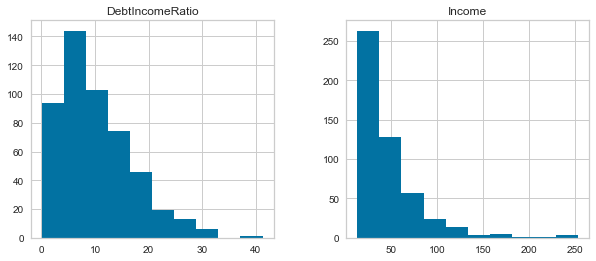

In [36]:
df.hist(figsize = (10,4));

In [37]:
df.isnull().sum()

Income             0
DebtIncomeRatio    0
dtype: int64

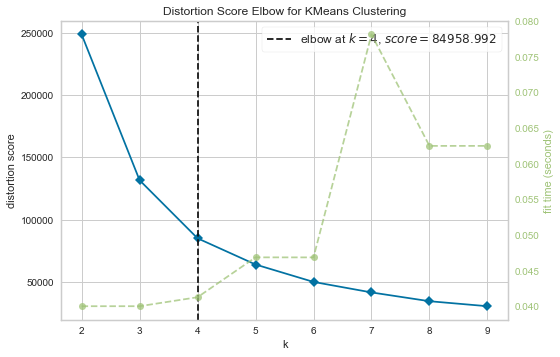

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10)) # 2'den 10'a kadar olan küme sayılarını dene ve bir görselleştir.
visualizer.fit(df)
visualizer.poof()

In [43]:
# Elbow'a göre en optimum kümeleme sayısı 4.
kmeans = KMeans(n_clusters = 4)
k_fit = kmeans.fit(df)
clusters = k_fit.labels_

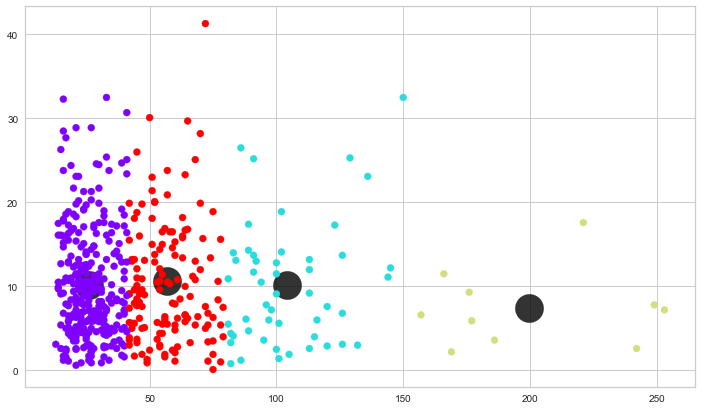

In [44]:
centers = k_fit.cluster_centers_
plt.figure(figsize=(12, 7))
plt.scatter(centers[:,0], centers[:,1], c = "black", s = 800, alpha = 0.8);
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=clusters,cmap="rainbow")

In [13]:
centers

array([[ 59.70149254,  10.39402985],
       [ 27.        ,  10.15239617],
       [107.60465116,  10.82325581],
       [199.6       ,   7.43      ]])

In [28]:
type(df)

pandas.core.frame.DataFrame